# Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup phases and times
times = np.linspace(0, 10, 100)

In [ ]:
def phase_cycle_component(phases, P_grid, lm):
    """
    phases: uniform grid on [0, 2π)
    P_grid: (len(phases), len(phases), T)
    lm    : (l, m)
    returns: (T,) ≈ ∬ e^{-i(l φ1 + m φ2)} P(t; φ1, φ2) dφ1 dφ2
    """
    l, m = lm
    phases = np.asarray(phases)
    L, M, T = P_grid.shape
    assert L == M == len(phases)

    dphi = np.diff(phases).mean()
    u1 = np.exp(-1j * l * phases)  # depends on φ1_i
    u2 = np.exp(-1j * m * phases)  # depends on φ2_i

    # start with zeros
    P_out = np.zeros(T, dtype=complex)

    # explicit double summation
    for i in range(L):
        for k in range(M):
            P_out += u1[i] * u2[k] * P_grid[i, k, :]

    return P_out * dphi * dphi

# Test with Function that doesnt not depend on phases

Phases from, to, length 0.0 4.71238898038469 4 [0.  0.5 1.  1.5]


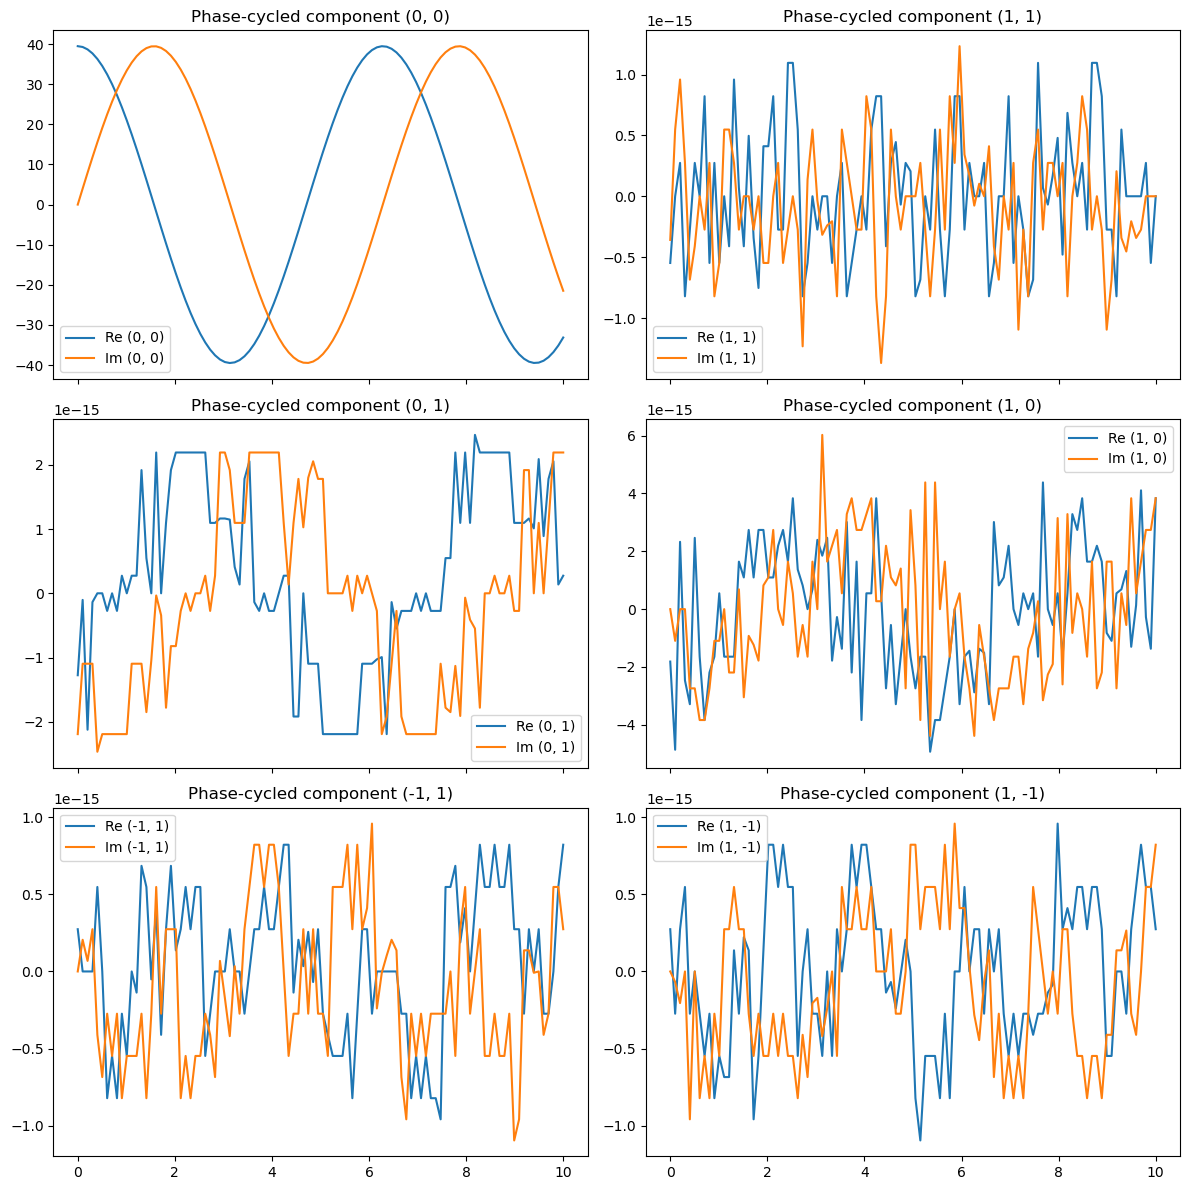

In [17]:
N_PHASES = 4  # Number of phase cycles for the simulation
DPHI = 2 * np.pi / N_PHASES
phases = DPHI * np.arange(N_PHASES)


# Test with function depending only on t
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(1j * w * t)

print("Phases from, to, length", phases[0], phases[-1], len(phases), phases / np.pi)
lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Linear in phi1

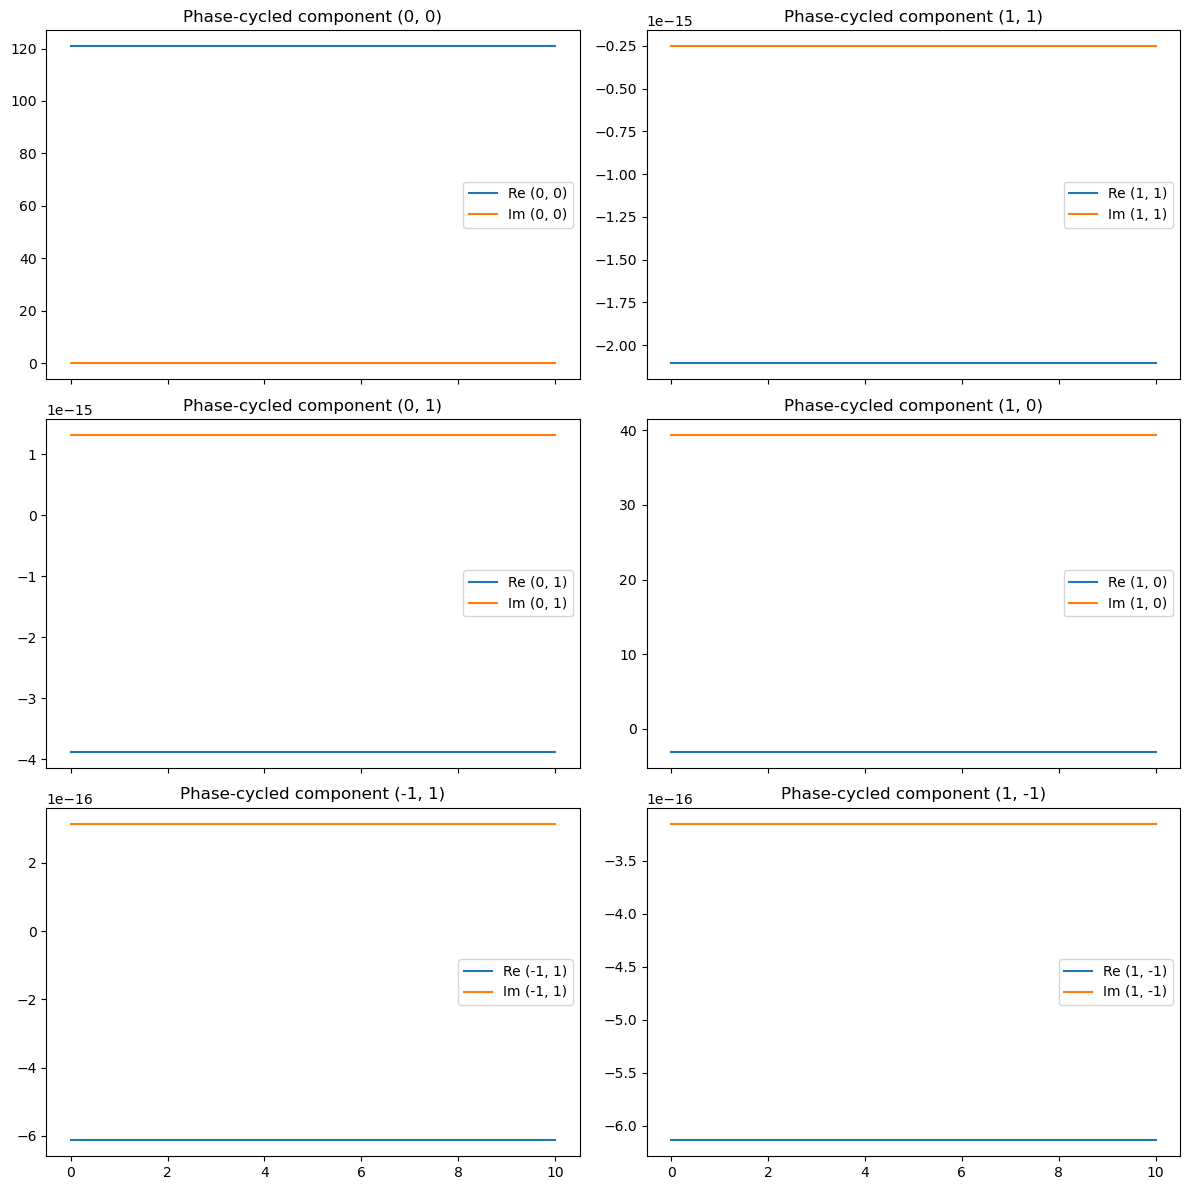

In [5]:
# Test with Linear in phi1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Product phi1 * phi2

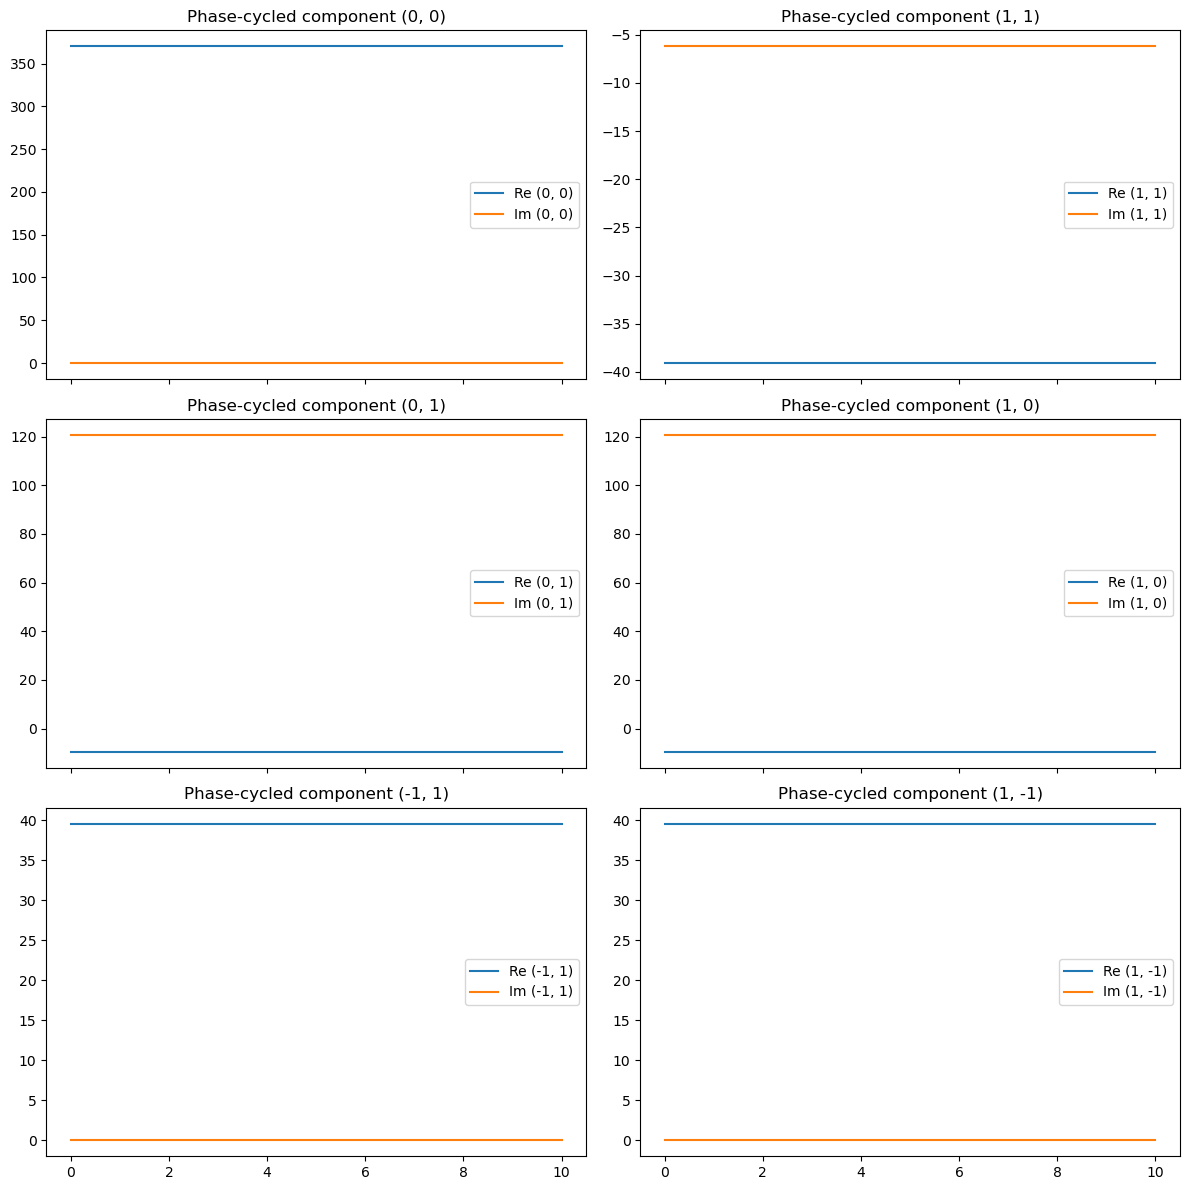

In [6]:
# Test with Product phi1 * phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1 * phi2

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - w t)

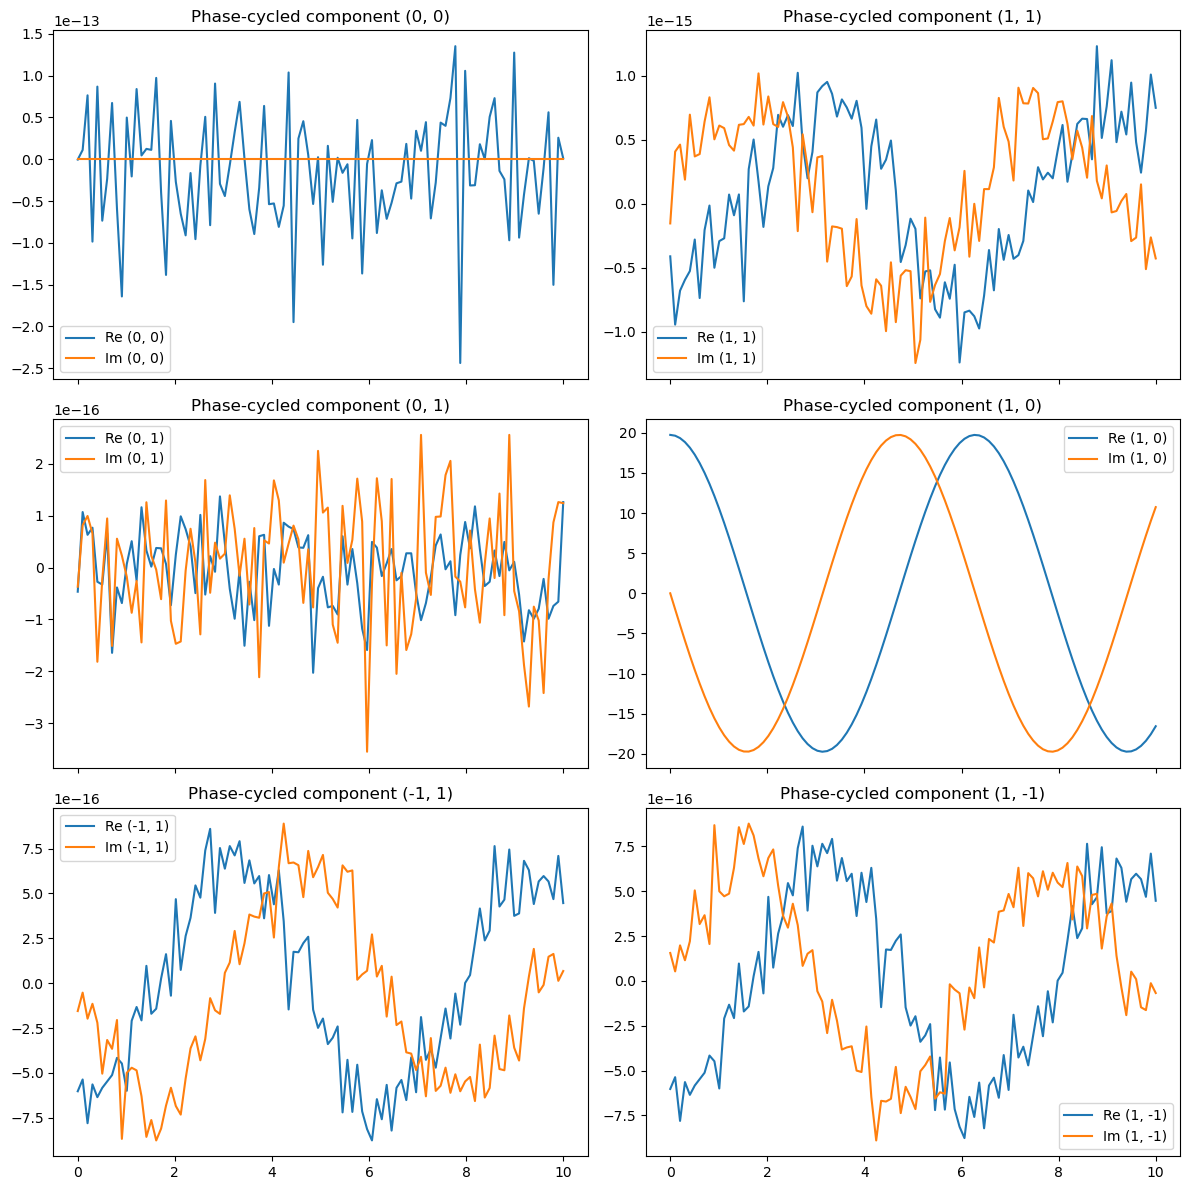

In [7]:
# Test with cos(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1 - w * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with exp(phi1 - w t)

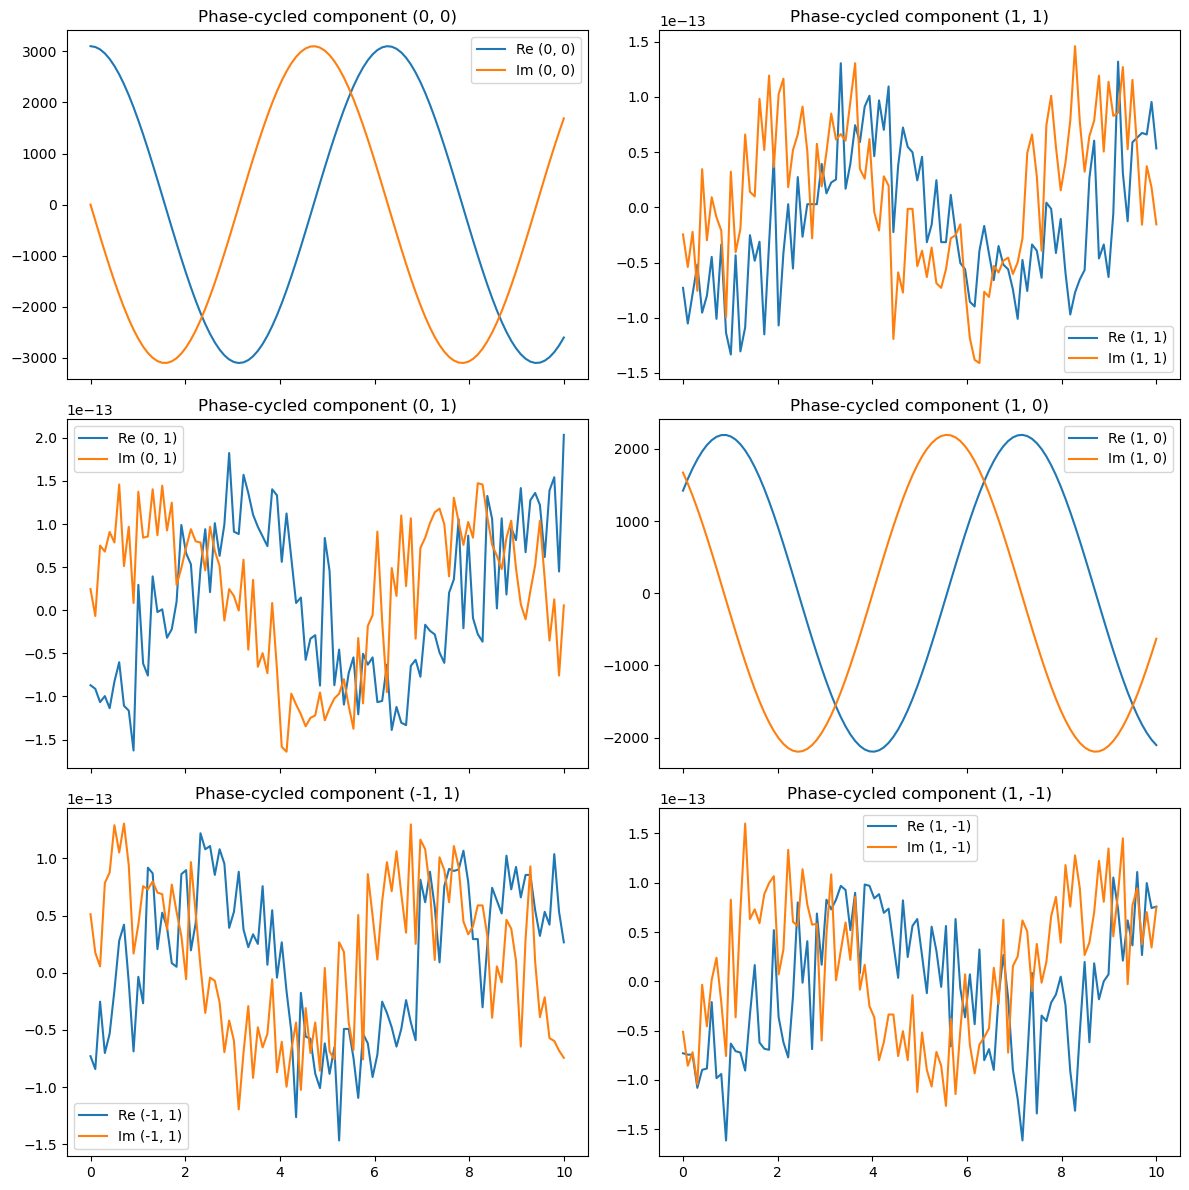

In [8]:
# Test with exp(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.exp((phi1 - 1j * w * t))

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - phi2)

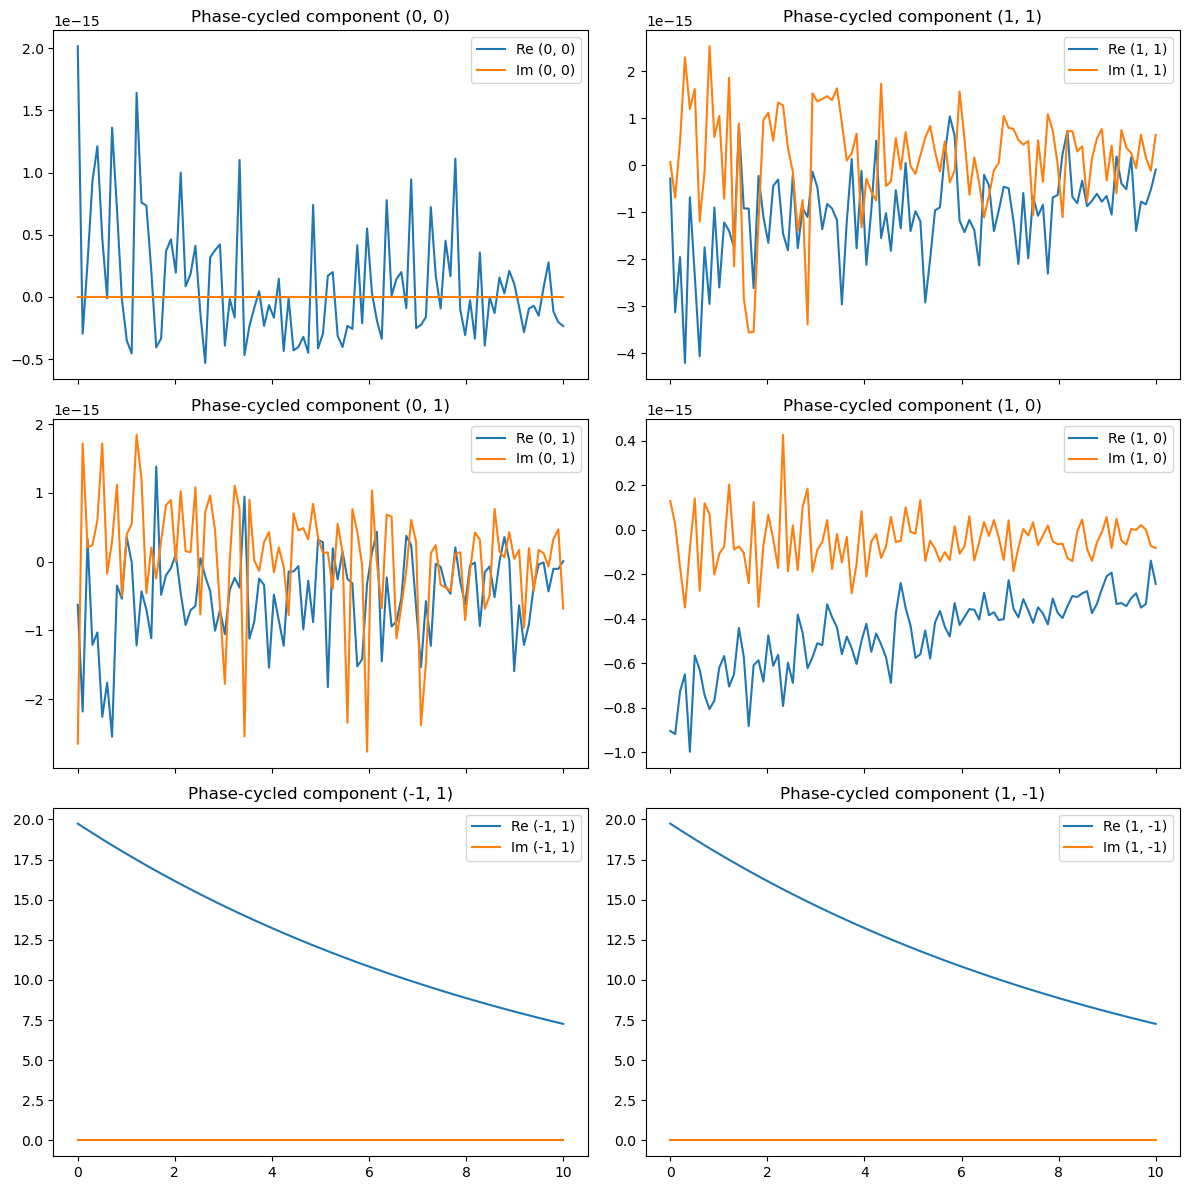

In [9]:
# Test with cos(phi1 - phi2) with exponential decay
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1  # decay rate
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(np.abs(phi1 - phi2)) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

In [22]:
phases[np.newaxis, :], phases[:, np.newaxis]

(array([[0.        , 1.57079633, 3.14159265, 4.71238898]]),
 array([[0.        ],
        [1.57079633],
        [3.14159265],
        [4.71238898]]))

this should correspond to phi1 = 0, phi2 = pi/2 (6.123233995736766e-17-1j)
this should correspond to phi1 = PI/2, phi2 = 0 (6.123233995736766e-17+1j)
Phases from, to, length 0.0 4.71238898038469 4


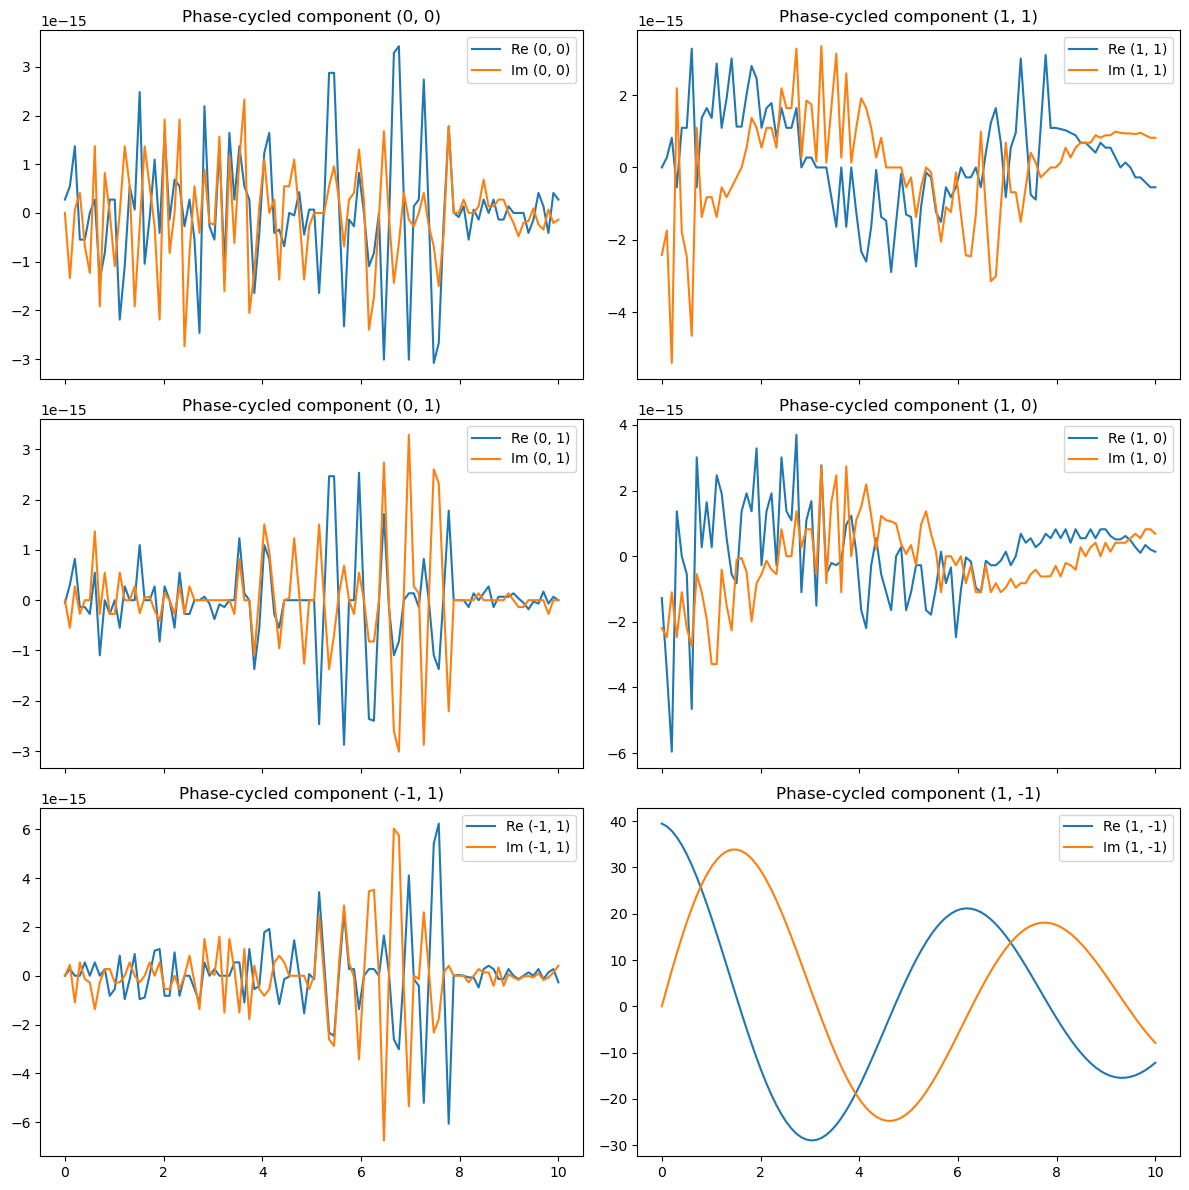

In [ ]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t -  1j * phases[np.newaxis, :] + 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

print("this should correspond to phi1 = 0, phi2 = pi/2", P_grid[0, 1, 0])
print("this should correspond to phi1 = PI/2, phi2 = 0", P_grid[1, 0, 0])

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

this should correspond to phi1 = 0, phi2 = pi/2 (6.123233995736766e-17+1j)
this should correspond to phi1 = PI/2, phi2 = 0 (6.123233995736766e-17-1j)


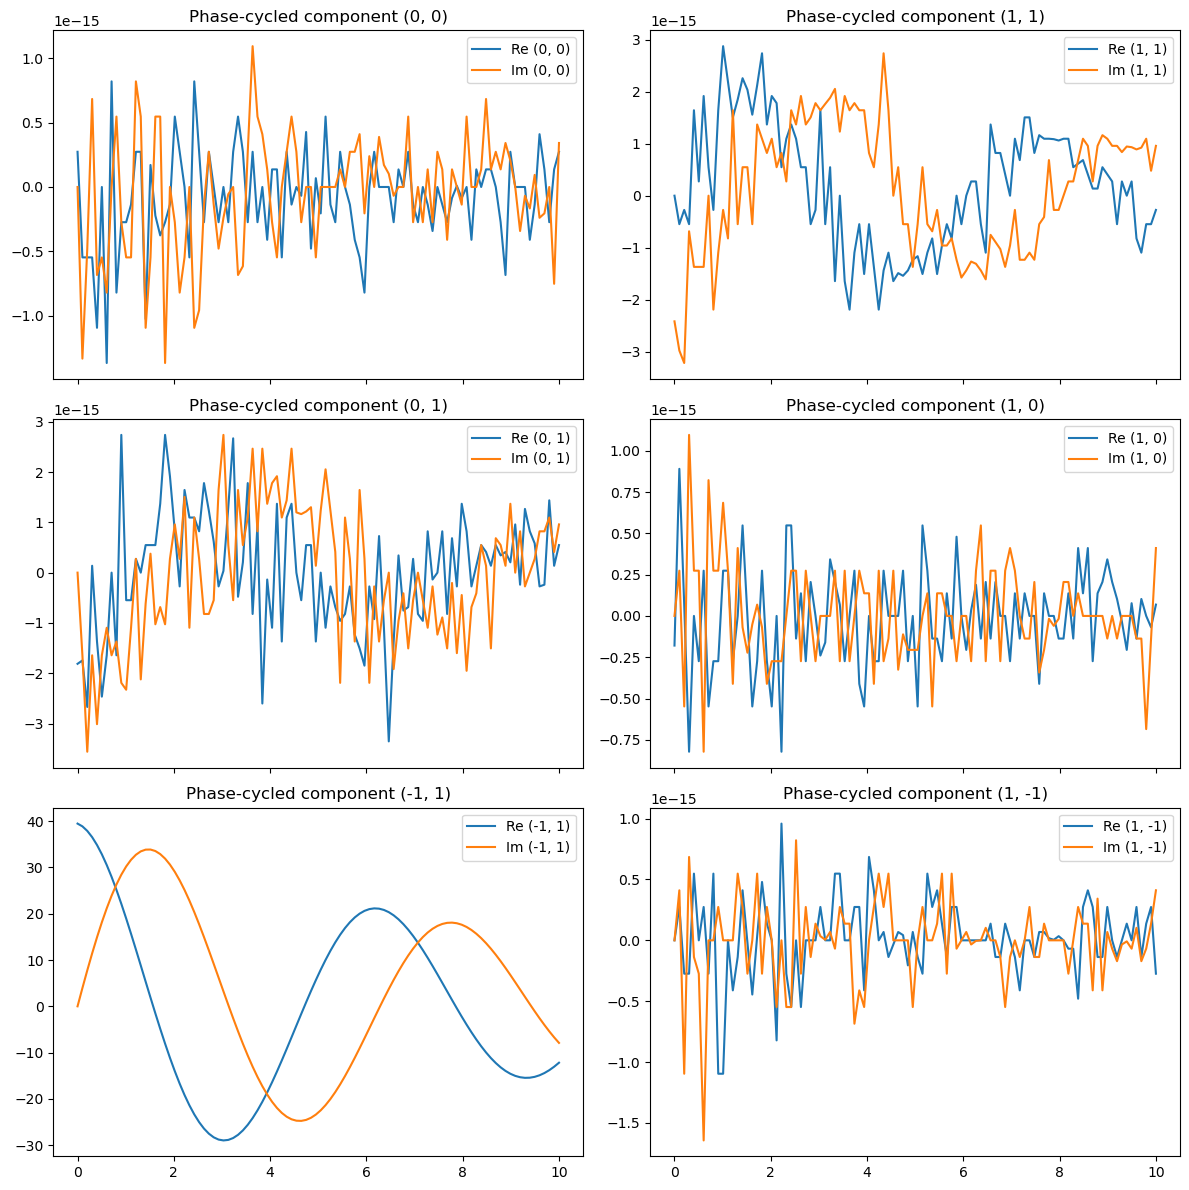

In [ ]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t +  1j * phases[np.newaxis, :] - 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()